In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.rcParams["font.size"] = 16

In [3]:
df_1 = pd.read_csv('winequality-white copy.csv', delimiter=';')
print(df_1.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [4]:
df_2 = pd.read_csv('winequality-red copy.csv', delimiter=';')
print(df_2.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
df_1["type"] = "white"
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [6]:
df_2["type"] = "red"
df_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
# checking if the two different df's containt the same values
df_1.columns == df_2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [8]:
#concatinating the two data sets : white wine and red wine 
df_s = [df_1,df_2]
final_df = pd.concat(df_s)

In [38]:
final_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,Normal
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,Normal
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,Normal
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,Normal
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,Normal
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,Normal
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,Normal
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,Normal


In [9]:
final_df.dropna(inplace=True)

In [10]:
final_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [11]:
final_df.duplicated(keep=False)

0        True
1        True
2        True
3        True
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 6497, dtype: bool

In [12]:
#fig-1:descriptive stats

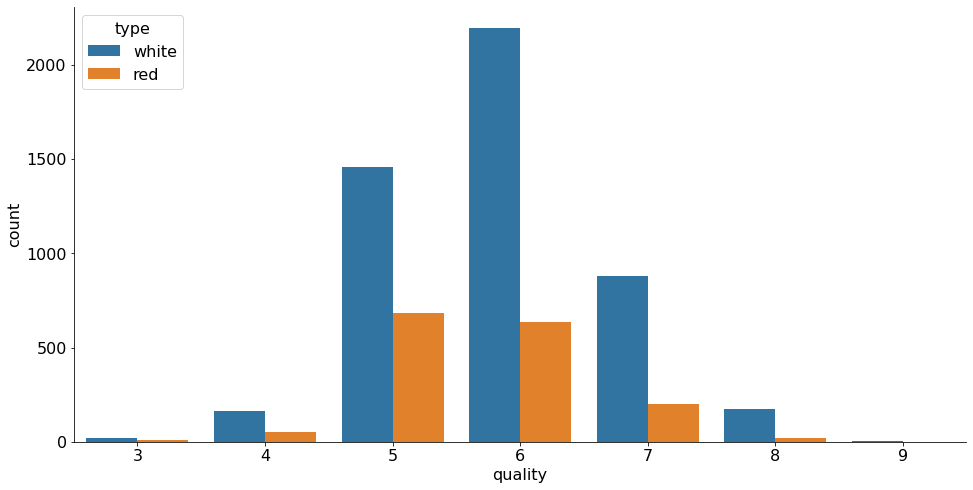

In [13]:
fig, ax = plt.subplots(figsize = (16,8))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
sns.countplot(data=final_df, x='quality',hue='type')

In [14]:
#separating the lower quality of wines from normal and high quality
final_df.loc[final_df['quality']<=4, "Quality"]="Low Quality"
final_df.loc[(final_df['quality']>=5)&(final_df['quality']<=7), "Quality"]="Normal"
final_df.loc[final_df['quality']>=8, "Quality"]="High Quality"

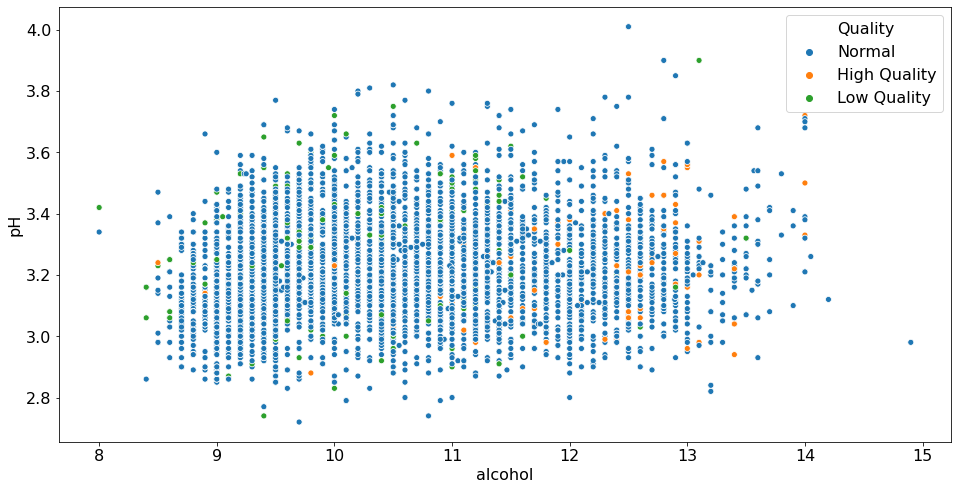

In [15]:
fig, ax = plt.subplots(figsize = (16,8))
sns.scatterplot(data=final_df,x='alcohol',y='pH',hue='Quality')
#more the alcohol,better the quality

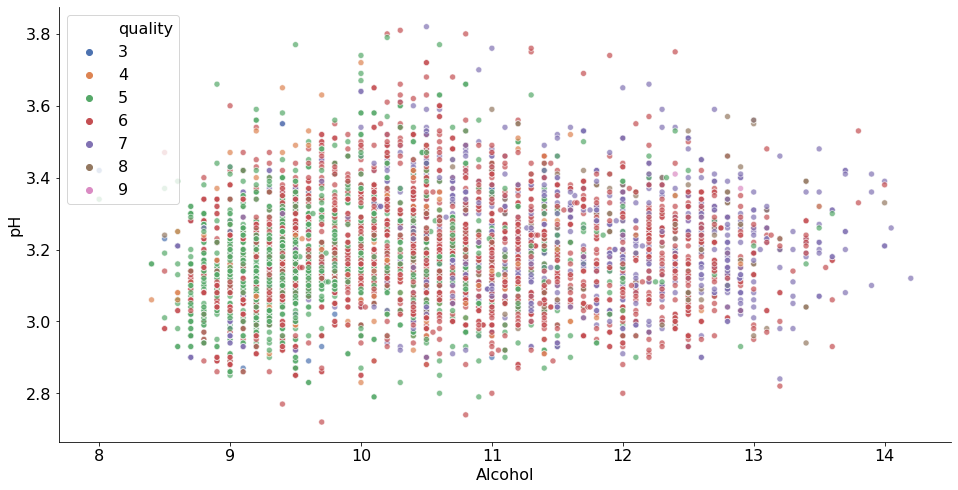

In [16]:
#checking with white wine df
fig, ax = plt.subplots(figsize = (16,8))
sns.scatterplot(x="alcohol", y="pH", hue= "quality", data=df_1, ax = ax, alpha = 0.7,palette="deep")
ax.set_xlabel("Alcohol")
ax.set_ylabel("pH")            
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

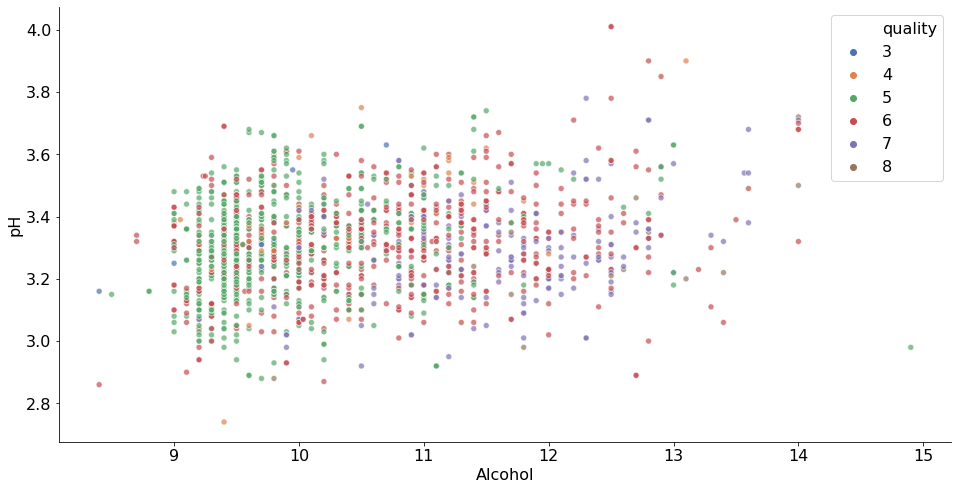

In [17]:
#checking with red wine df
fig, ax = plt.subplots(figsize = (16,8))
sns.scatterplot(x="alcohol", y="pH", hue= "quality", data=df_2, ax = ax, alpha = 0.7,palette="deep")
ax.set_xlabel("Alcohol")
ax.set_ylabel("pH")            
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

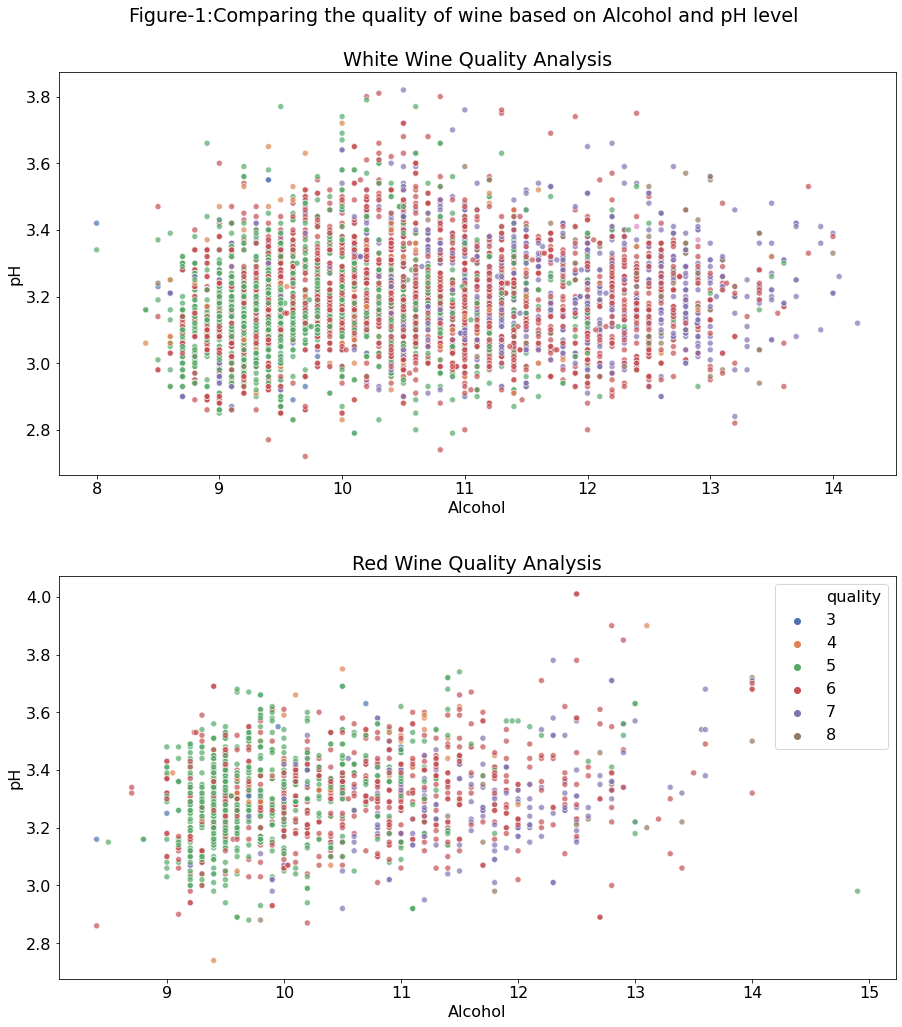

In [18]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,15))
fig.suptitle('Figure-1:Comparing the quality of wine based on Alcohol and pH level')
sns.scatterplot(x="alcohol", y="pH", hue= "quality", data=df_1, ax = ax1, alpha = 0.7,palette="deep")
sns.scatterplot(x="alcohol", y="pH", hue= "quality", data=df_2, ax = ax2, alpha = 0.7,palette="deep")
ax1.set_title('White Wine Quality Analysis')
ax1.set_xlabel("Alcohol")
ax2.set_xlabel("Alcohol")
ax1.set_ylabel("pH")
ax2.set_ylabel("pH")
ax2.set_title('Red Wine Quality Analysis')
plt.subplots_adjust(top=0.92, bottom=0.08, left= None, right= None, hspace=0.25)
ax1.get_legend().remove()

In [19]:
#fig-2: unsupervised ml

In [20]:
final_df2 = final_df.copy()
km = KMeans(n_clusters = 6)
km.fit_predict(final_df2[["alcohol"]], final_df2["fixed acidity"])
final_df2["cluster"] = km.fit_predict(final_df2[["alcohol"]], final_df2["fixed acidity"])
final_df2.head()
#final_df2.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Quality,cluster
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,Normal,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Normal,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Normal,5
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Normal,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Normal,2


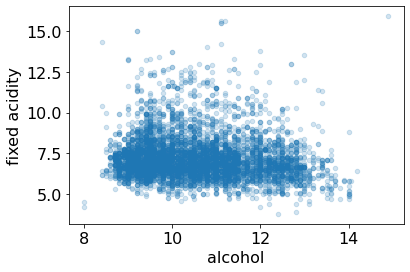

In [21]:
final_df2.plot.scatter(x="alcohol", y="fixed acidity",alpha=0.2)

In [22]:
#km.cluster_centers_

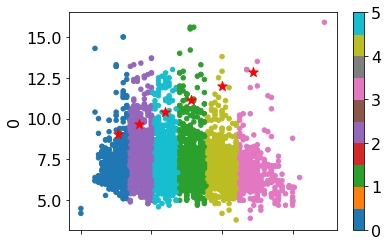

In [23]:
ax = final_df2.plot.scatter(x="alcohol", y="fixed acidity", c=final_df2["cluster"], cmap="tab10")
centroids = pd.DataFrame(km.cluster_centers_)
centroids.plot.scatter(x=0, y=0, c="red", s=100, ax=ax,marker ="*")

In [24]:
km.inertia_ 

353.7756851070124

Text(0, 0.5, 'avg squared dist to centroid')

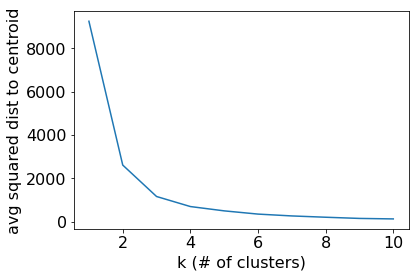

In [25]:
scores = pd.Series(dtype=float)

for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(final_df2[["alcohol"]], final_df2["fixed acidity"])
    scores.loc[k] = km.inertia_
    
ax = scores.plot.line()
ax.set_xlabel("k (# of clusters)")
ax.set_ylabel("avg squared dist to centroid")

In [26]:
#centroids

Text(0.5, 1.0, 'Fig-2 : Wine Category Predicition')

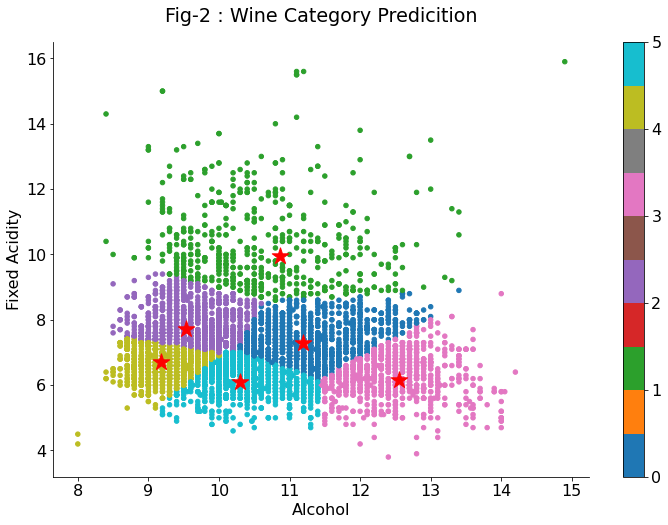

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
kmeans = KMeans(n_clusters=6, init = 'random', max_iter = 1, random_state = 5).fit(final_df2[['fixed acidity','alcohol']])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(final_df2[['fixed acidity','alcohol']].columns.values))
final_df2.plot.scatter(x = 'alcohol', y = 'fixed acidity', c= kmeans.labels_, figsize=(12,8), cmap="tab10", ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'alcohol', y = 'fixed acidity', ax = ax, mark_right=False, c = "red",s=300,marker = "*")
ax.set_xlabel("Alcohol")
ax.set_ylabel("Fixed Acidity")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Fig-2 : Wine Category Predicition", pad=20)

In [28]:
#fig-3: supervised ml

In [29]:
final_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,Normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Normal


In [30]:
#lr = LinearRegression()

In [31]:
# X=final_df[['chlorides']]
# y=final_df["quality"]

In [32]:
#lr.fit(X,y)

In [33]:
train, test = train_test_split(final_df, stratify = final_df["type"])
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Quality
1267,8.0,0.22,0.42,14.6,0.044,45.0,163.0,1.00030,3.21,0.69,8.6,7,white,Normal
1150,8.2,0.33,0.32,2.8,0.067,4.0,12.0,0.99473,3.30,0.76,12.8,7,red,Normal
4659,6.6,0.25,0.25,1.3,0.040,28.0,85.0,0.98984,2.87,0.48,11.2,6,white,Normal
3205,6.8,0.45,0.36,5.0,0.033,28.0,156.0,0.99100,3.11,0.40,12.4,7,white,Normal
2366,7.4,0.33,0.44,7.6,0.050,40.0,227.0,0.99679,3.12,0.52,9.0,5,white,Normal


In [34]:
model = Pipeline([
    ("poly", PolynomialFeatures(include_bias = False)),
    ("sc", StandardScaler()),
    ("km" , KMeans(n_clusters = 6)),
    ("logr",LogisticRegression()),
])

In [35]:
model.fit(train[["fixed acidity", "chlorides", "sulphates"]],train["type"])


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('sc', StandardScaler()), ('km', KMeans(n_clusters=6)),
                ('logr', LogisticRegression())])

In [36]:
model.score(train[["fixed acidity", "chlorides", "sulphates"]],train["type"])


0.916256157635468

Text(0.5, 1.0, 'Fig-3 : Logistic Regression Coefficients')

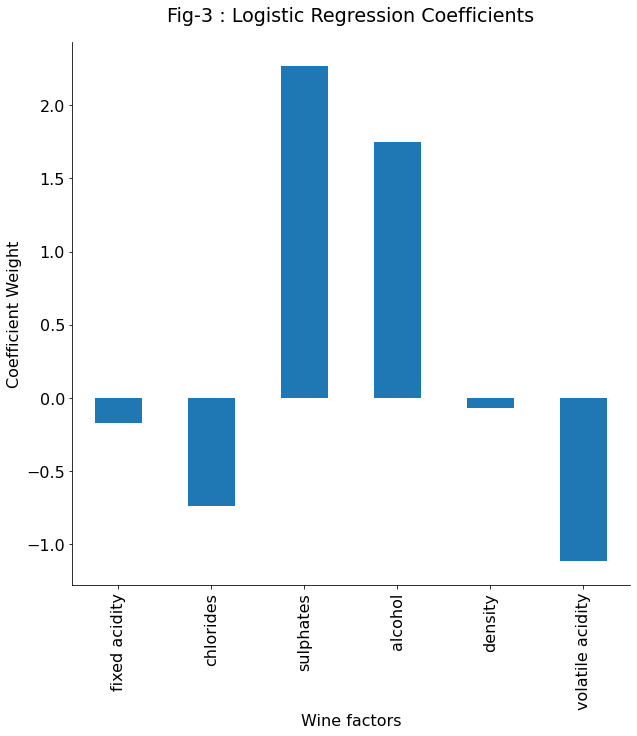

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
cols = ["fixed acidity", "chlorides", "sulphates","alcohol","density","volatile acidity"]
pd.Series(model["logr"].coef_.reshape(-1), index=cols).plot.bar()
ax.set_xlabel("Wine factors")
ax.set_ylabel("Coefficient Weight")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Fig-3 : Logistic Regression Coefficients", pad=20)